<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/OnlineShoppingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is taken from Harvard Website

link -> https://cs50.harvard.edu/ai/2020/projects/4/shopping/

Your task in this problem is to build a nearest-neighbor classifier to solve this problem. Given information about a user — how many pages they’ve visited, whether they’re shopping on a weekend, what web browser they’re using, etc. — your classifier will predict whether or not the user will make a purchase. 

In [1]:
# importing the dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# importing the dataset
dataset = pd.read_csv('/content/shopping.csv')
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# checking if there are any null values
dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

We have to create an unbiased dataset out of the biased dataset

TRUE -> 1908

FALSE -> 10422, we have to take only 1908 out of this to make the dataset unbiased

In [34]:
# seperating the dataset based on feature 'Revenue'
true = dataset[dataset.Revenue==True]
false = dataset[dataset.Revenue==False]

In [35]:
print(true.shape)
print(false.shape)

(1908, 18)
(10422, 18)


In [53]:
# taking 2000 out of 10422 datapoints with value of 'Revenue' as False
false_required = false.sample(n=2000)

In [44]:
print(false_required.shape)

(2000, 18)


In [56]:
# saving this dataset to csv file for further use
false_required.to_csv('false_sample_dataset.csv')

Checking if the sample we took is similar to that of the whole dataset, only then it's a valid sample dataset

In [54]:
print(false_required.describe())

       Administrative  Administrative_Duration  Informational  \
count     2000.000000              2000.000000    2000.000000   
mean         2.131500                73.304343       0.500500   
std          3.273311               179.591863       1.229128   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          0.000000                 0.000000       0.000000   
75%          3.000000                79.608333       0.000000   
max         24.000000              3398.750000       9.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             2000.000000     2000.000000              2000.000000   
mean                31.030121       29.597500              1125.366471   
std                133.956371       41.455178              2258.617891   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

In [46]:
print(false.describe())

       Administrative  Administrative_Duration  Informational  \
count    10422.000000             10422.000000   10422.000000   
mean         2.117732                73.740111       0.451833   
std          3.202481               171.017970       1.211582   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          0.000000                 0.000000       0.000000   
75%          3.000000                83.000000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            10422.000000    10422.000000             10422.000000   
mean                30.236237       28.714642              1069.987809   
std                133.909306       40.744717              1803.797757   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        6.00000

In [87]:
false.groupby('Revenue').mean()

<ipython-input-87-dd842776865b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  false.groupby('Revenue').mean()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
Revenue,,,,,,,,,,,,,,,
False,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,2.129726,2.339474,3.159278,4.078392,0.227308


In [88]:
false_required.groupby('Revenue').mean()

<ipython-input-88-6088452749c2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  false_required.groupby('Revenue').mean()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
Revenue,,,,,,,,,,,,,,,
False,2.1315,73.304343,0.5005,31.030121,29.5975,1125.366471,0.024536,0.046214,1.996741,0.0739,2.135,2.3365,3.077,4.03,0.229


Visualizing the dataset

In [57]:
# merging both the dataset (True + False)
new_dataset = pd.concat([true, false_required], axis=0)

<Axes: xlabel='Month', ylabel='count'>

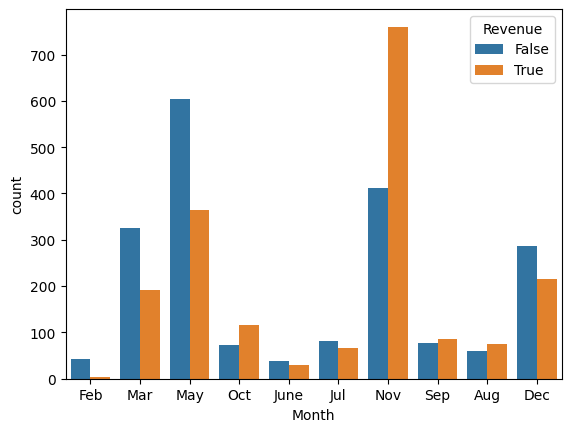

In [98]:
# count plot of Month in new_dataset for true and false
sns.countplot(x='Month', hue='Revenue', data=new_dataset)

<Axes: xlabel='Region', ylabel='count'>

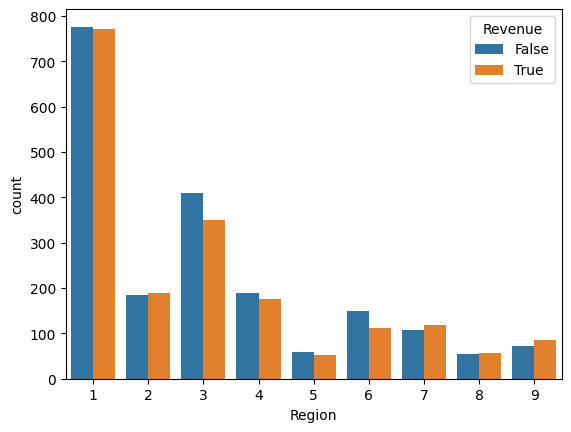

In [99]:
# count plot of Region in new_dataset for true and false
sns.countplot(x='Region', hue='Revenue', data=new_dataset)

<Axes: xlabel='Weekend', ylabel='count'>

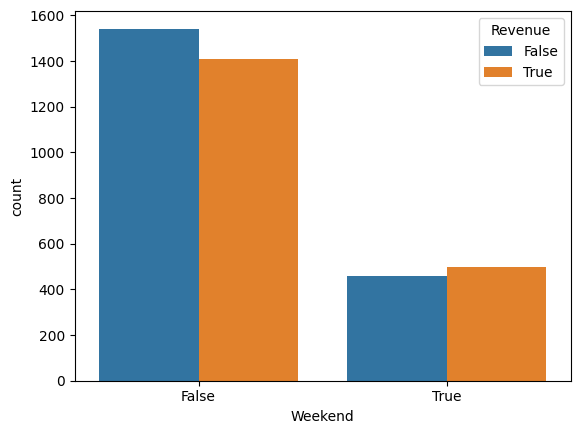

In [101]:
# count plot of Weekend in new_dataset for true and false
sns.countplot(x='Weekend', hue='Revenue', data=new_dataset)

<Axes: xlabel='VisitorType', ylabel='count'>

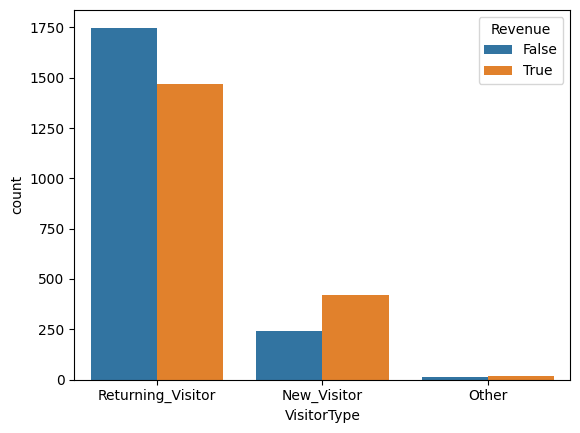

In [102]:
# count plot of VisitorType in new_dataset for true and false
sns.countplot(x='VisitorType', hue='Revenue', data=new_dataset)

In [61]:
print(new_dataset.shape)
print(new_dataset['Revenue'].value_counts())

(3908, 18)
False    2000
True     1908
Name: Revenue, dtype: int64


In [6]:
x = new_dataset.drop(columns='Revenue', axis=1) # contains the non-target features
y = new_dataset['Revenue'] # contains the target feature

Label Encoding

In [62]:
encoder = LabelEncoder()

In [63]:
x['Month'] = encoder.fit_transform(x['Month'])
x['VisitorType'] = encoder.fit_transform(x['VisitorType'])
x['Weekend'] = encoder.fit_transform(x['Weekend'])
y = encoder.fit_transform(y) # FALSE -> 0,   TRUE -> 1

In [64]:
print(y)

[0 0 0 ... 0 0 0]


Splitting the dataset into training and testing

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2,stratify=y)

Training the Model

1. LogisticRegression

In [66]:
model = LogisticRegression()

In [76]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluation

In [77]:
x_train_prediction = model.predict(x_train)

In [78]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [79]:
print(training_data_accuracy)

0.8828061638280617


In [80]:
x_test_prediction = model.predict(x_test)

In [81]:
testing_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [82]:
print(testing_data_accuracy)

0.8799675587996756


2. RandomForestClassifier

In [89]:
model2 = RandomForestClassifier()

In [90]:
model2.fit(x_train, y_train)

RandomForestClassifier()

In [91]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print(training_data_accuracy)

0.8828061638280617


In [92]:
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(y_test, x_test_prediction)
print(testing_data_accuracy)

0.8799675587996756


Prediction System

In [83]:
x_test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
5939,8,760.9,3,206.1,36,2400.667778,0.008527,0.023721,0.0,0.0,7,1,2,7,2,2,0
4322,0,0.0,0,0.0,6,317.500000,0.000000,0.040000,0.0,0.0,6,1,1,3,4,0,1
8743,6,143.5,2,303.0,67,2199.976786,0.008333,0.027665,0.0,0.0,7,1,1,1,2,2,1
269,0,0.0,0,0.0,6,236.500000,0.000000,0.016667,0.0,0.0,5,1,1,1,3,2,1
1518,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,5,3,2,1,3,2,0


In [84]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
input_data = (0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,6,1,1,7,2,2,1) # 0
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction) # predicts FALSE, correctly

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
